<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
boston = pd.read_csv("datasets/boston_data.csv")

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
X = boston.drop(columns = 'MEDV')
y = boston['MEDV']

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [4]:
# check for null values
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# check dtypes
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [6]:
predictors = ['CRIM', 'RM', 'B', 'LSTAT']

# 50/50 train/test split
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=42)

In [7]:
# instantiate model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# train score
lr.score(X_train, y_train)

0.6918125781926259

In [9]:
# test score
lr.score(X_test, y_test)

0.6079766272408789

In [10]:
# cross val score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.6657022608209727

/Users/syhrn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


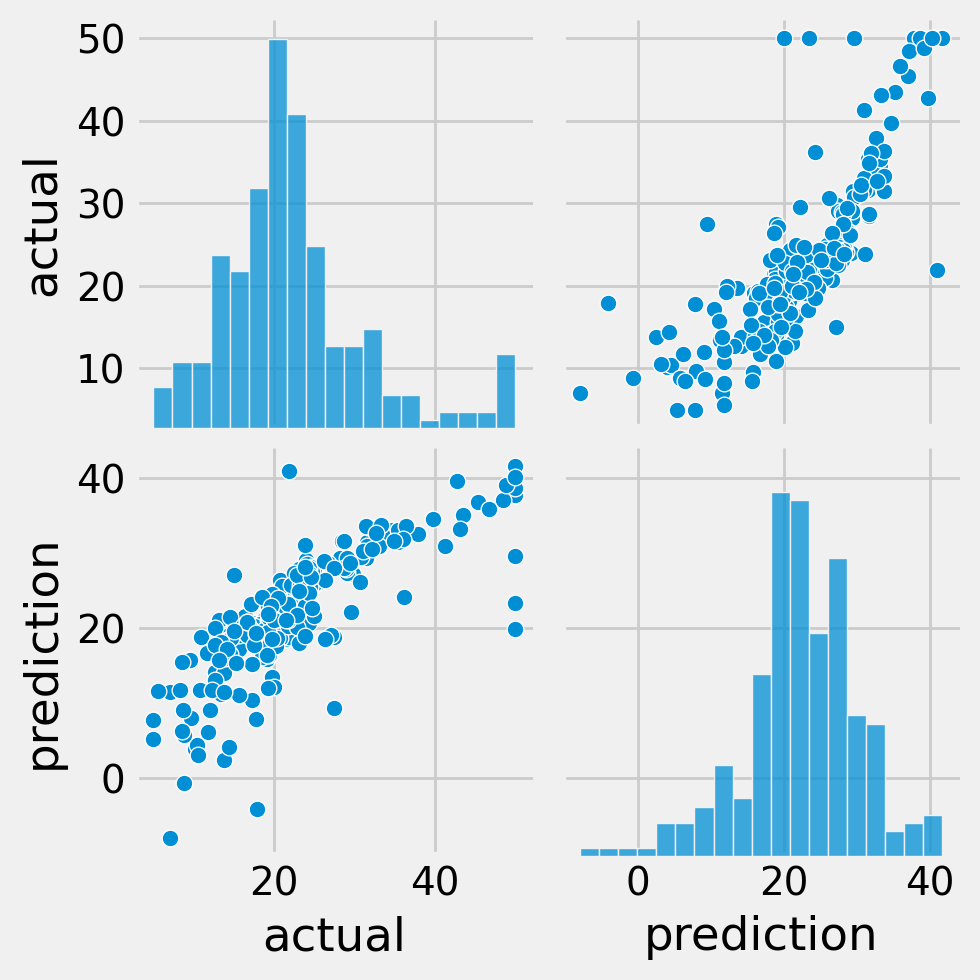

In [11]:
# plot predictions
yhat = lr.predict(X_test)
joint_df = pd.DataFrame({"actual": y_test,
                         "prediction": yhat})
sns.pairplot(data=joint_df,)

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

In [12]:
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)

In [13]:
# generate scores for 70/30 split
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score_70 = lr.score(X_train, y_train)
test_score_30 = lr.score(X_test, y_test)
cv_7030 = cross_val_score(lr, X_train, y_train, cv=5).mean()

print(f"Train score for 70/30 split is {train_score_70}.")
print(f"Test score for 70/30 split is {test_score_30}.")
print(f"Cross validation score for 70/30 split is {cv_7030}.")

Train score for 70/30 split is 0.666915164469765.
Test score for 70/30 split is 0.6162784690754453.
Cross validation score for 70/30 split is 0.6106828151996906.


/Users/syhrn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


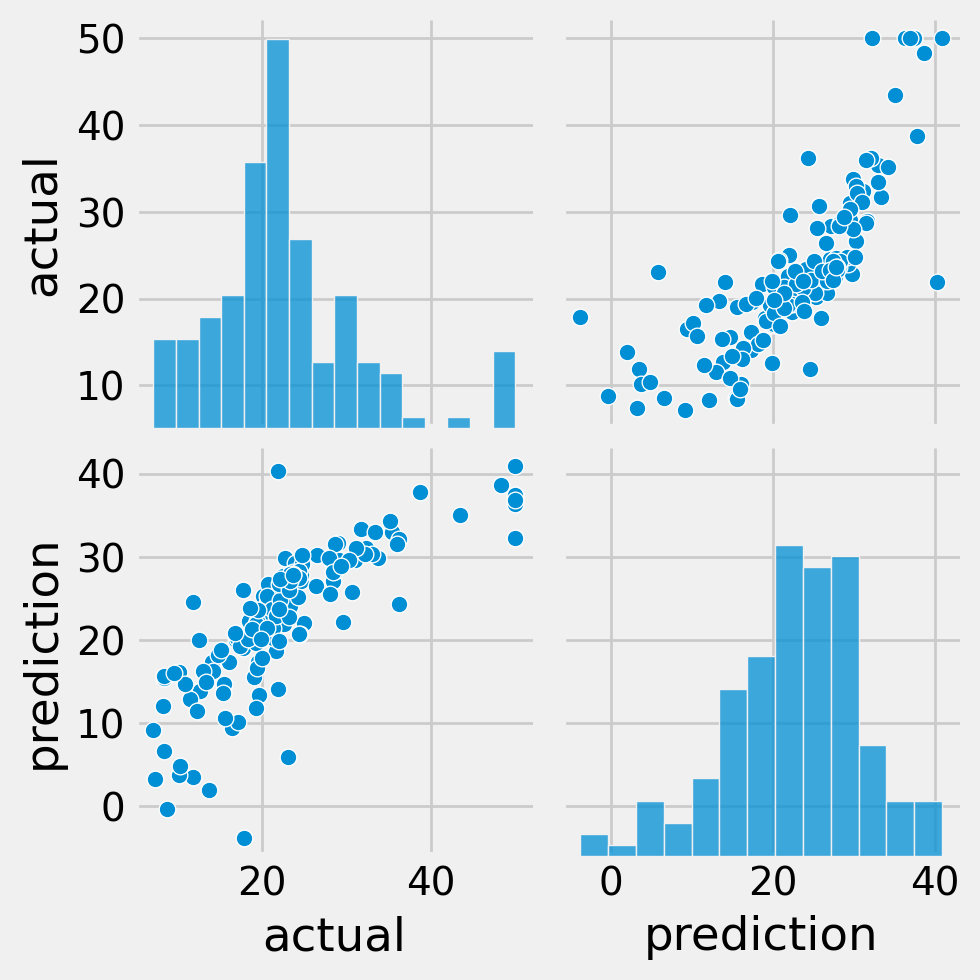

In [14]:
# plot predictions for 70/30
yhat = lr.predict(X_test)
joint_df = pd.DataFrame({"actual": y_test,
                         "prediction": yhat})
sns.pairplot(data=joint_df,)

In [15]:
# 90/10 train/test split
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, random_state=8)

In [16]:
# generate scores for 90/10 split
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score_90 = lr.score(X_train, y_train)
test_score_10 = lr.score(X_test, y_test)
cv_9010 = cross_val_score(lr, X_train, y_train, cv=5).mean()

print(f"Train score for 70/30 split is {train_score_90}.")
print(f"Test score for 70/30 split is {test_score_10}.")
print(f"Cross validation score for 70/30 split is {cv_9010}.")

Train score for 70/30 split is 0.6625354351654724.
Test score for 70/30 split is 0.5837369556472737.
Cross validation score for 70/30 split is 0.6167570042456758.


/Users/syhrn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


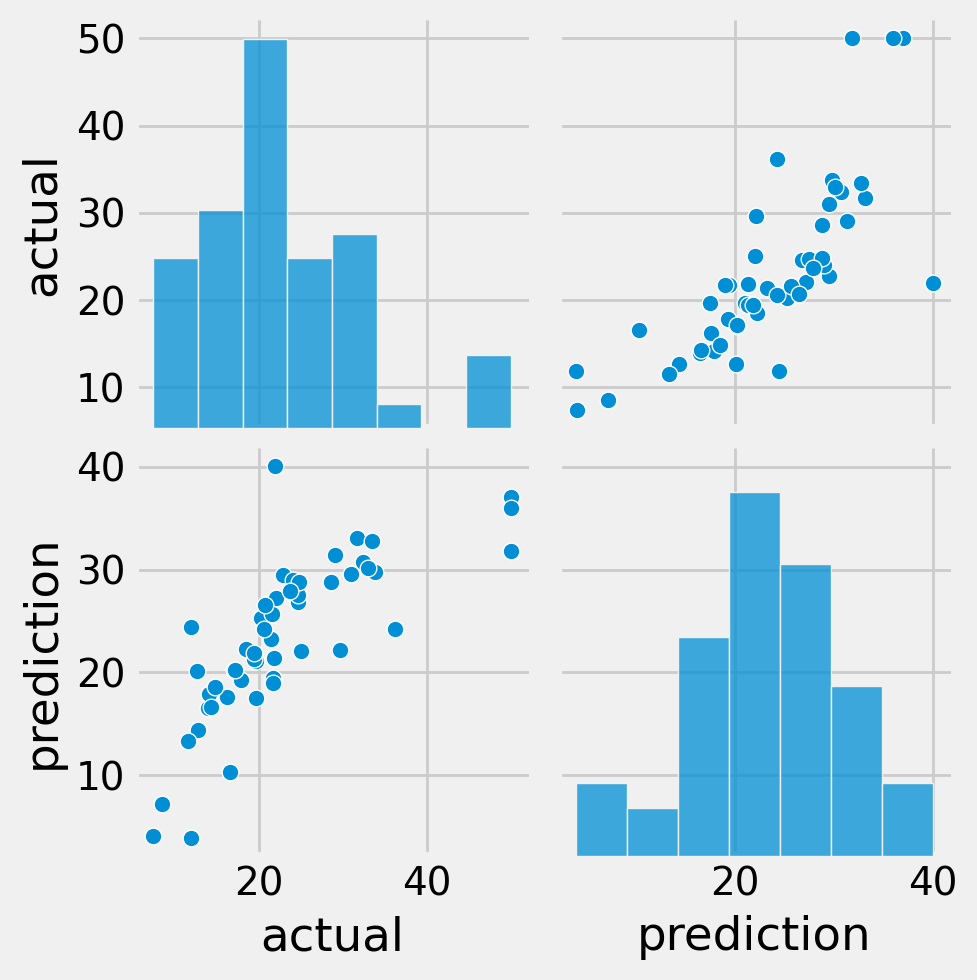

In [17]:
# plot predictions for 90/10
yhat = lr.predict(X_test)
joint_df = pd.DataFrame({"actual": y_test,
                         "prediction": yhat})
sns.pairplot(data=joint_df,)

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [18]:
# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------')
    print ('K:', folds)
    model = LinearRegression()
    
    # perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds) # generate list of CV scores
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores)) # calculate mean of CV scores
    print("Std CV R2:", np.std(scores)) # calculate std dev of CV scores
    
    # make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print ("Cross-Predicted R2:", r2)


------------------------------------
K: 5
Cross-validated scores: [ 0.64643662  0.70494178  0.44154394  0.08682092 -0.49941486]
Mean CV R2: 0.27606567946777594
Std CV R2: 0.443999110102392
Cross-Predicted R2: 0.5179358218718029
------------------------------------
K: 6
Cross-validated scores: [ 0.60629456  0.70763272  0.52029859  0.61899961 -0.33584065 -0.21629338]
Mean CV R2: 0.3168485760705507
Std CV R2: 0.42415051724798364
Cross-Predicted R2: 0.4759342853373084
------------------------------------
K: 7
Cross-validated scores: [ 0.65523009  0.59556838  0.5358105   0.49507761  0.24551663 -0.69093403
  0.11913605]
Mean CV R2: 0.27934360353234433
Std CV R2: 0.434553073115359
Cross-Predicted R2: 0.4237786401686885
------------------------------------
K: 8
Cross-validated scores: [ 0.67248867  0.61782209  0.68506083  0.61035927  0.58782058 -0.28495311
 -1.03064528  0.03693312]
Mean CV R2: 0.23686076994423477
Std CV R2: 0.5828049393173513
Cross-Predicted R2: 0.5821905733958437
------------

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [19]:
from itertools import combinations

combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

combs

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',),
 ('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NO

### 5.1) Explain what could be wrong with this approach.

In [22]:
R2_results = {}
linreg = LinearRegression()
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print (i)
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


In [23]:
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)

In [24]:
for i in range(5):
    print (results[i])

(('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5052751616354451)
(('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5046498339504802)
(('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.504205105036623)
(('CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5029314837237953)
(('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.4948565952408949)


### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [21]:
import patsy

# A: